### Carolyn Randall
#### Looking at student data from Kaggle
#### please ignore the HR and NZ migration data stuff as those were my inital sets I tried
#### There are two data sets one for student math class and one for student Portuguese class
#### I would like to see if I can determine what factors contribute to the low grades and the high grades
#### I would also like to see if there is any difference between Math and Portuguese grades for students in both sets.  Just what I am thinking now



#### Some things to try xxx
* EXPLORE the data
* Visual the data
* run some models - will probably try linear regression, and maybe decision tree and then decide what other models to apply

## for my homework I am still just exploring and trying visualizations
### as this is the third data set I tried, and I am now happy to use this, I have not gottenvery far just basic exploration

In [1]:
#import some libraries
import pandas as pd
import numpy as np

In [2]:
# read the student maths data set into a Dataframe called 'studentmat
studentmat = pd.read_csv('student-mat.csv')  
# read the student portuguese data into a Dataframe called 'studentport'
studentport = pd.read_csv('student-por.csv')  

###  Below is a description of what the headings and the values in these fields means
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2.	sex - student's sex (binary: 'F' - female or 'M' - male)

3.	age - student's age (numeric: from 15 to 22)

4.	address - student's home address type (binary: 'U' - urban or 'R' - rural)

5.	famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6.	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7.	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8.	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9.	Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10.	Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11.	reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12.	guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13.	traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.	schoolsup - extra educational support (binary: yes or no)
17.	famsup - family educational support (binary: yes or no)
18.	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.	activities - extra-curricular activities (binary: yes or no)
20.	nursery - attended nursery school (binary: yes or no)
21.	higher - wants to take higher education (binary: yes or no)
22.	internet - Internet access at home (binary: yes or no)
23.	romantic - with a romantic relationship (binary: yes or no)
24.	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.	health - current health status (numeric: from 1 - very bad to 5 - very good)	30.	absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
	1.	G1 - first period grade (numeric: from 0 to 20)
	2.	G2 - second period grade (numeric: from 0 to 20)
	3.	G3 - final grade (numeric: from 0 to 20, output target)


In [3]:
# take a peak at the head of studentmat
studentmat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# take a look at the tail of studentmat
studentmat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# Let us see how many rows there are in Math student data
len(studentmat)

395

In [6]:
# lets look at the shape, rows and columns
studentmat.shape

(395, 33)

In [7]:
# let us get a description of maths student data
studentmat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
# ADD HERE a quick comment on the data above, initial observations

In [9]:
# do we have any missing data?
studentmat.isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# take a peak at the tail of studentport
studentport.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
# take a look at the tail of studentport
studentport.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [12]:
#let us look at the number of rows in the Portuguese data
len(studentport)

649

In [13]:
# let us look at rows and columns
studentport.shape

(649, 33)

In [14]:
# let us take a peak using description
studentport.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
studentport.columns == studentmat.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [16]:
len(studentmat.columns)

33

In [17]:
# do we have any missing data?
studentport.isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
studentmat.isnull().sum() 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [19]:
# before we merge we need to add a column to each dataset to know what subject math or portuguese the 
# grades apply to
studentmat['subject'] = 'M'

In [20]:
# check the head to see it is added
studentmat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,M


In [21]:
studentport['subject'] = 'P'

In [22]:
studentport.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,P


In [23]:
# now merge
studentsall=pd.merge(studentmat, studentport, how='outer')

In [24]:
# check the head to see it is added
studentsall.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,M


In [25]:
studentsall.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,P
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,P
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,P
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,P
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,P


In [26]:
# how many records in the math data set
len(studentmat)

395

In [27]:
#how many records in the portuguese data set
len(studentport)

649

In [28]:
# double check the merge includes all the data should be 395 + 649=1044
len(studentsall)

1044

In [29]:
# ADD HERE  a comment on the intial observation of the describe data

### do some visualizing

In [30]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bf0aba8>]], dtype=object)

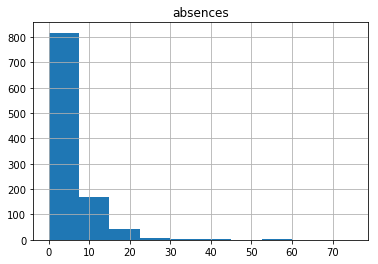

In [31]:
studentsall[['absences']].hist()

In [32]:
# not really sure how to interpret the graph above just did it to see what would come out

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e650080>]], dtype=object)

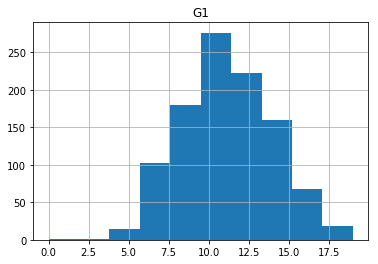

In [33]:
studentsall[['G1']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e6deac8>]], dtype=object)

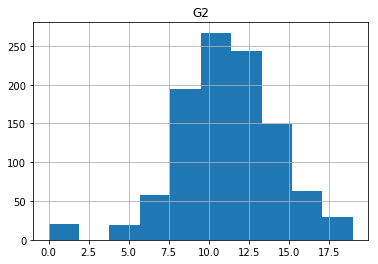

In [34]:
studentsall[['G2']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e800c88>]], dtype=object)

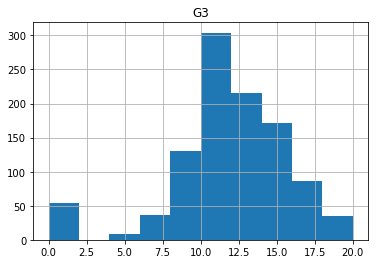

In [35]:
studentsall[['G3']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e9e8198>]], dtype=object)

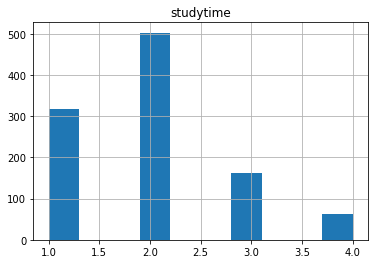

In [36]:
studentsall[['studytime']].hist()

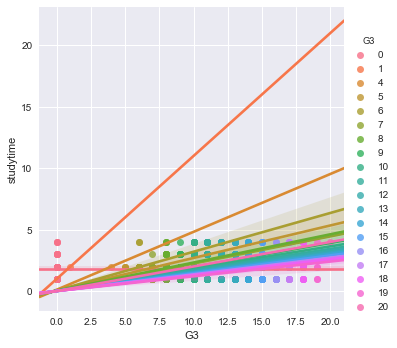

In [37]:
#try a scatter plot
import seaborn as sns
sns.set(color_codes=True)
# Draw a Scatterplot showing G1 and studytime
sns.lmplot(x='G3', y="studytime", hue="G3", data=studentsall, fit_reg=True)

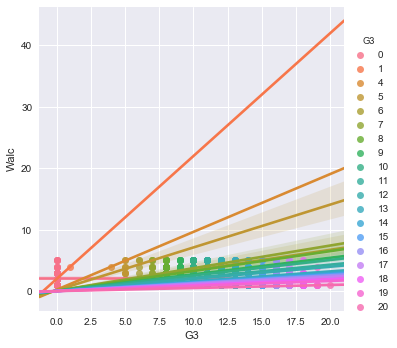

In [38]:
# now look at a plot with G1 and WALC weekend alcohol consumption
sns.lmplot(x='G3', y="Walc", hue="G3", data=studentsall, fit_reg=True)

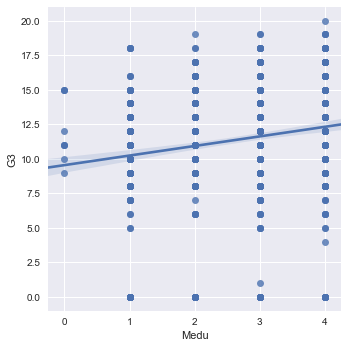

In [39]:
# check the distribution of G1 vs. Medu mothers education using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='Medu', data=studentsall)

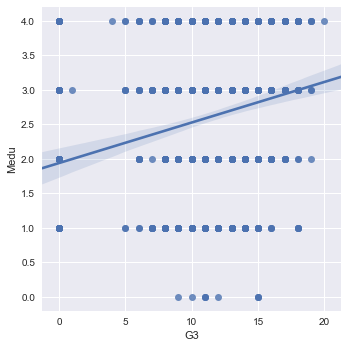

In [40]:
# check the distribution of G1 vs. Medu mothers education using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='Medu', x='G3', data=studentsall)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


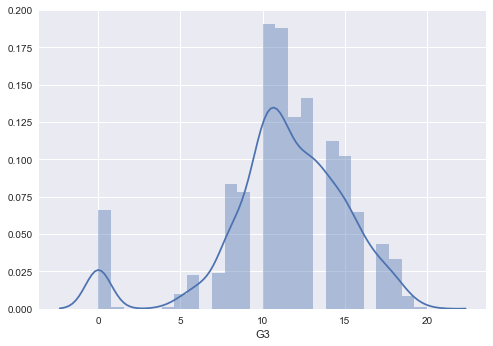

In [41]:
sns.distplot(studentsall.G3)

In [42]:
# found these functions on kaggle so using them they look useful to see data values
def get_feature_lists_by_dtype(data):
    features = data.columns.tolist()
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))
def show_all_uniques(data):
    dtypes = get_feature_lists_by_dtype(data)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [43]:
show_all_uniques(studentsall)

object

school: count(2) ['GP' 'MS']
sex: count(2) ['F' 'M']
address: count(2) ['U' 'R']
famsize: count(2) ['GT3' 'LE3']
Pstatus: count(2) ['A' 'T']
Mjob: count(5) ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: count(5) ['teacher' 'other' 'services' 'health' 'at_home']
reason: count(4) ['course' 'other' 'home' 'reputation']
guardian: count(3) ['mother' 'father' 'other']
schoolsup: count(2) ['yes' 'no']
famsup: count(2) ['no' 'yes']
paid: count(2) ['no' 'yes']
activities: count(2) ['no' 'yes']
nursery: count(2) ['yes' 'no']
higher: count(2) ['yes' 'no']
internet: count(2) ['no' 'yes']
romantic: count(2) ['no' 'yes']
subject: count(2) ['M' 'P']

int64

age: count(8) [18 17 15 16 19 22 20 21]
Medu: count(5) [4 1 3 2 0]
Fedu: count(5) [4 1 2 3 0]
traveltime: count(4) [2 1 3 4]
studytime: count(4) [2 3 1 4]
failures: count(4) [0 3 2 1]
famrel: count(5) [4 5 3 1 2]
freetime: count(5) [3 2 4 1 5]
goout: count(5) [4 3 2 1 5]
Dalc: count(5) [1 2 5 3 4]
Walc: count(5) [1 3 2 4 5]
health

In [44]:
# now I see about half my data is numeric and half non-numeric, so I need to convert the data 
# to numeric
# I will start with just maybe 3 columns and try out some models, then later convert them all
from sklearn.dummy import DummyClassifier
# Convert categorical columns to binary representations
students_with_dummies = pd.get_dummies(data=studentsall, columns = ['sex', 'school','activities','romantic'], prefix = ['sex', 'school','activies','romantic'] )
students_with_dummies.head()


,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,G3,subject,sex_F,sex_M,school_GP,school_MS,activies_no,activies_yes,romantic_no,romantic_yes
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,6,M,1,0,1,0,1,0,1,0
1,17,U,GT3,T,1,1,at_home,other,course,father,...,6,M,1,0,1,0,1,0,1,0
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,10,M,1,0,1,0,1,0,1,0
3,15,U,GT3,T,4,2,health,services,home,mother,...,15,M,1,0,1,0,0,1,0,1
4,16,U,GT3,T,3,3,other,other,home,father,...,10,M,1,0,1,0,1,0,1,0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G2,G3,sex_F,sex_M,school_GP,school_MS,activies_no,activies_yes,romantic_no,romantic_yes
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,...,-0.119475,-0.125282,0.038832,-0.038832,-0.169938,0.169938,0.073648,-0.073648,-0.173800,0.173800
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,...,0.224662,0.201472,-0.109387,0.109387,0.235114,-0.235114,-0.116924,0.116924,0.008685,-0.008685
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,...,0.182634,0.159796,-0.070786,0.070786,0.187611,-0.187611,-0.093800,0.093800,0.039906,-0.039906
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,...,-0.140163,-0.102627,-0.042508,0.042508,-0.258834,0.258834,0.025834,-0.025834,-0.013603,0.013603
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,...,0.183167,0.161629,0.239972,-0.239972,0.133255,-0.133255,-0.078847,0.078847,-0.038435,0.038435
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,...,-0.377172,-0.383145,-0.065543,0.065543,-0.066856,0.066856,0.027500,-0.027500,-0.076042,0.076042
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,...,0.042054,0.054461,-0.074725,0.074725,0.036359,-0.036359,-0.051574,0.051574,0.051891,-0.051891
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,...,-0.068952,-0.064890,-0.181603,0.181603,-0.026008,0.026008,-0.128601,0.128601,-0.012372,0.012372
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,...,-0.108411,-0.097877,-0.062530,0.062530,-0.037000,0.037000,-0.072236,0.072236,-0.003606,0.003606
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,...,-0.131576,-0.129642,-0.275928,0.275928,-0.066006,0.066006,0.010584,-0.010584,-0.045311,0.045311


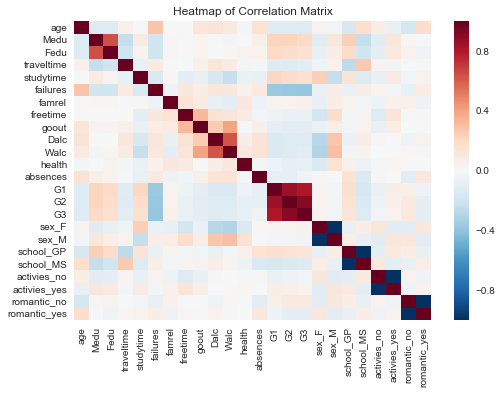

In [45]:
# now time to do something with the data
#Plot a Correlation Matrix
corr = students_with_dummies.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

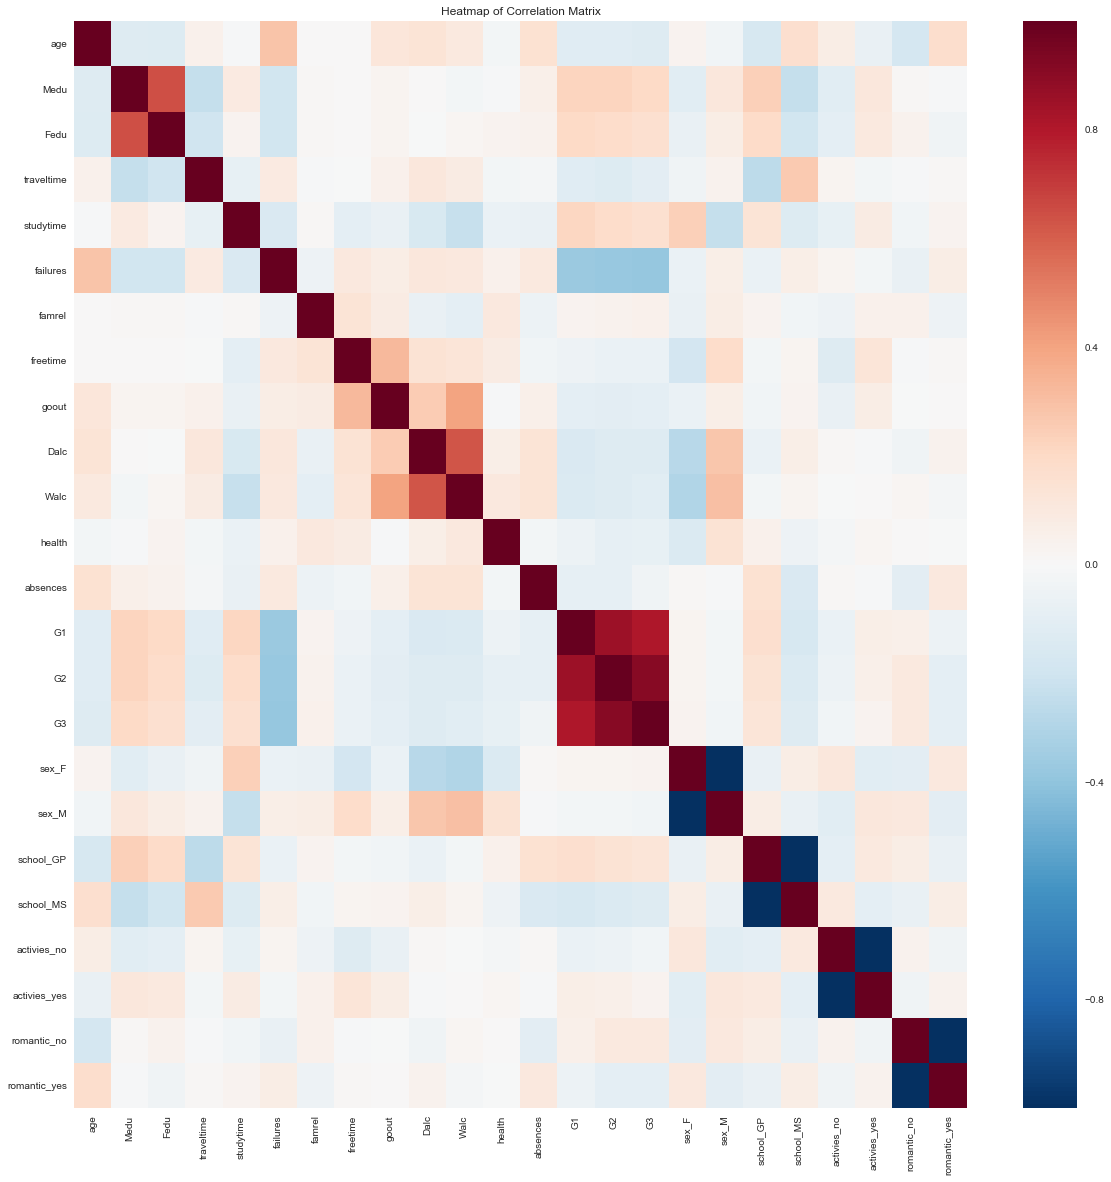

In [46]:
# larger view
# Let's make that plot a bit larger
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [47]:
#Extract ''G3'' column, because 'G3' is our target value
corr_left = pd.DataFrame(corr['G3'].drop('G3'))
corr_left.sort_values(by = 'G3', ascending = False)

,G3
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
school_GP,0.127114
romantic_no,0.098363
famrel,0.054461
activies_yes,0.033998
sex_F,0.031472


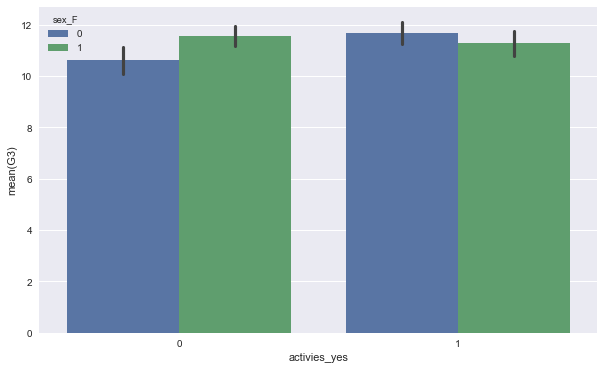

In [48]:
# if you xx
plt.figure(figsize = (10,6))
sns.barplot(x='activies_yes', y = 'G3', hue = 'sex_F', data = students_with_dummies)

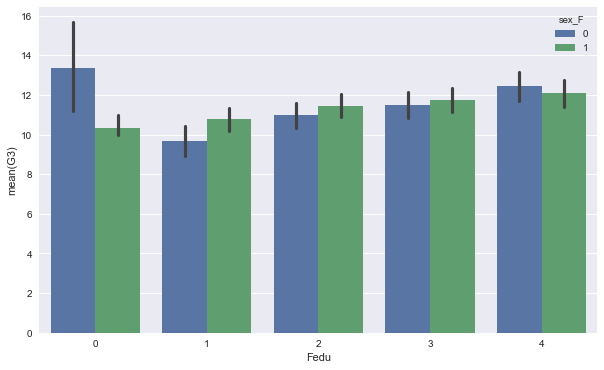

In [49]:
# take a look at father's education
plt.figure(figsize = (10,6))
sns.barplot(x='Fedu', y = 'G3', hue = 'sex_F', data = students_with_dummies)

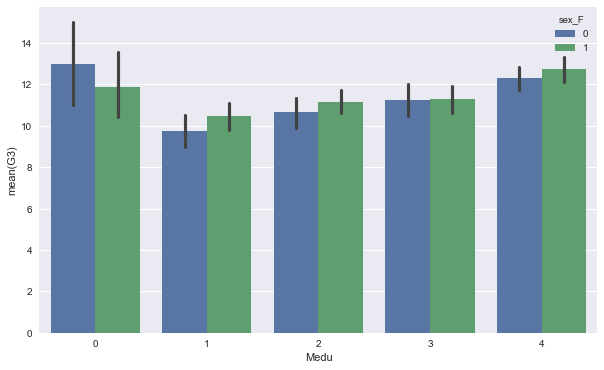

In [50]:
# take a look at mother's education
plt.figure(figsize = (10,6))
sns.barplot(x='Medu', y = 'G3', hue = 'sex_F', data = students_with_dummies)

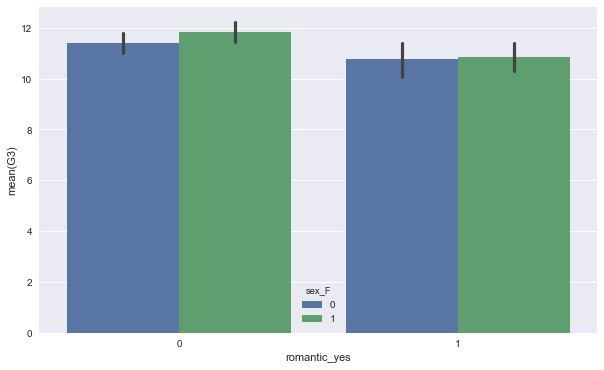

In [51]:
# take a look at mother's education
plt.figure(figsize = (10,6))
sns.barplot(x='romantic_yes', y = 'G3', hue = 'sex_F', data = students_with_dummies)

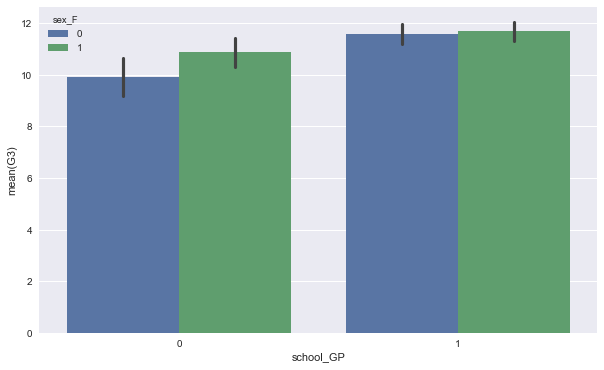

In [52]:
# take a look at mother's education
plt.figure(figsize = (10,6))
sns.barplot(x='school_GP', y = 'G3', hue = 'sex_F', data = students_with_dummies)

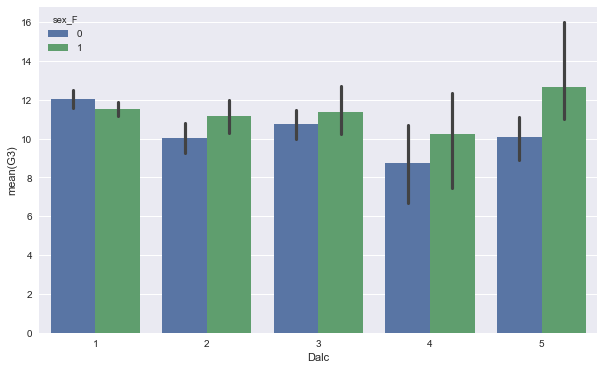

In [53]:
# take a look at daily alchol's
plt.figure(figsize = (10,6))
sns.barplot(x='Dalc', y = 'G3', hue = 'sex_F', data = students_with_dummies)

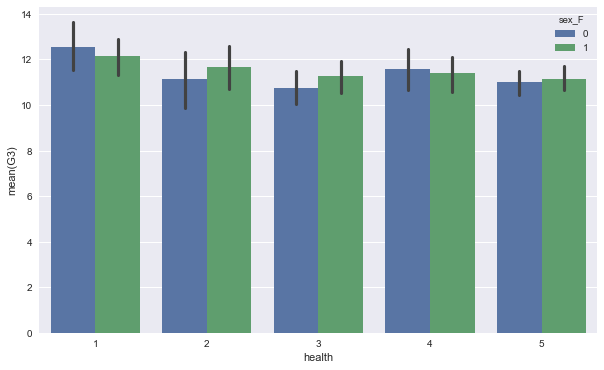

In [54]:
# take a look at mother's education
plt.figure(figsize = (10,6))
sns.barplot(x='health', y = 'G3', hue = 'sex_F', data = students_with_dummies)

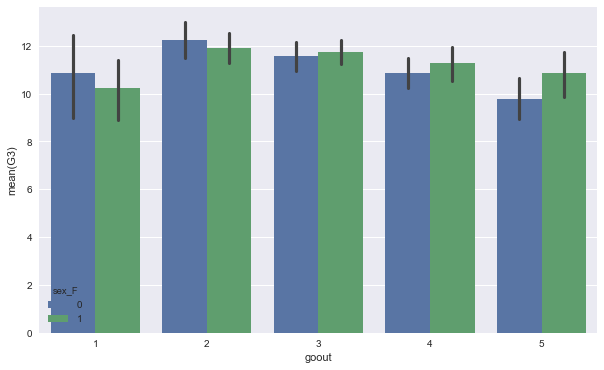

In [55]:
# take a look at 
plt.figure(figsize = (10,6))
sns.barplot(x='goout', y = 'G3', hue = 'sex_F', data = students_with_dummies)

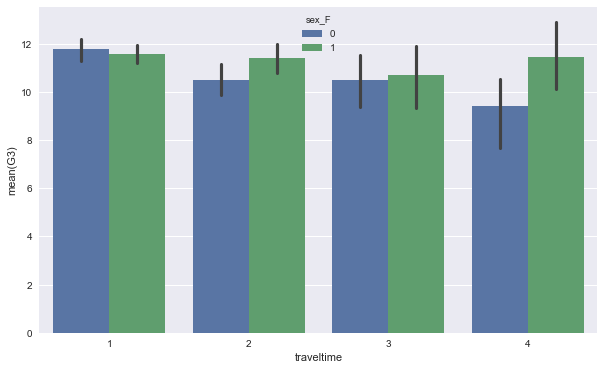

In [56]:
# take a look at 
plt.figure(figsize = (10,6))
sns.barplot(x='traveltime', y = 'G3', hue = 'sex_F', data = students_with_dummies)

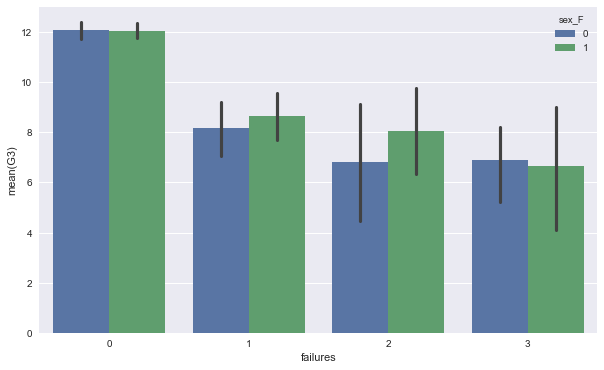

In [57]:
# take a look at 
plt.figure(figsize = (10,6))
sns.barplot(x='failures', y = 'G3', hue = 'sex_F', data = students_with_dummies)

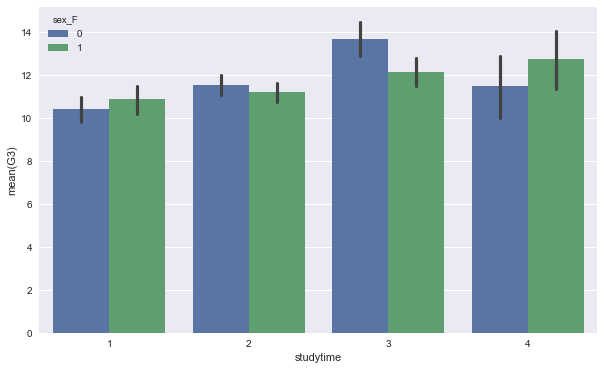

In [58]:
# take a look at 
plt.figure(figsize = (10,6))
sns.barplot(x='studytime', y = 'G3', hue = 'sex_F', data = students_with_dummies)

In [59]:
import pandas_profiling
pandas_profiling.ProfileReport(studentsall)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,34
Number of observations,1044
Total Missing (%),0.0%
Total size in memory,285.5 KiB
Average record size in memory,280.0 B
Numeric,15
Categorical,18
Date,0
Text (Unique),0
Rejected,1
Distinct count,5


In [60]:
pandas_profiling.ProfileReport(students_with_dummies)

Number of variables,38
Number of observations,1044
Total Missing (%),0.0%
Total size in memory,261.0 KiB
Average record size in memory,256.0 B
Numeric,23
Categorical,14
Date,0
Text (Unique),0
Rejected,1
Distinct count,5


In [61]:
# Now I am going to convert the rest of the strings to numerics so I can take a look
students_with_dummies2 = pd.get_dummies(data=studentsall, columns = ['sex', 'school','activities','romantic','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'internet','subject'], prefix = ['sex', 'school','activies','romantic','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'internet','subject'] )
students_with_dummies2.head()

,age,Medu,Fedu,reason,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P
0,18,4,4,course,2,2,0,yes,no,no,...,0,0,1,0,1,0,1,0,1,0
1,17,1,1,course,1,2,0,no,yes,no,...,1,0,0,1,0,0,0,1,1,0
2,15,1,1,other,1,2,3,yes,no,yes,...,1,0,0,0,1,0,0,1,1,0
3,15,4,2,home,1,3,0,no,yes,yes,...,0,1,0,0,1,0,0,1,1,0
4,16,3,3,home,1,2,0,no,yes,yes,...,1,0,0,1,0,0,1,0,1,0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,internet_no,internet_yes,subject_M,subject_P
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,...,0.038894,0.001709,-0.061390,-0.126978,-0.081701,0.357601,0.033229,-0.033229,-0.018790,0.018790
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,...,-0.115679,-0.019372,0.260111,-0.043620,0.097703,-0.103730,-0.249728,0.249728,0.101246,-0.101246
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,...,-0.230861,0.024698,0.348978,0.094286,-0.046298,-0.072834,-0.170012,0.170012,0.094795,-0.094795
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,...,0.099122,-0.031258,-0.021649,0.024526,-0.061961,0.070983,0.169485,-0.169485,-0.079881,0.079881
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,...,-0.038541,0.011951,-0.033607,0.011457,-0.020958,0.018770,-0.049695,0.049695,0.060934,-0.060934
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,...,0.007676,0.031904,-0.073646,-0.059589,-0.090476,0.261738,0.074263,-0.074263,0.083043,-0.083043
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,...,0.017535,0.045152,-0.054509,0.008734,0.003844,-0.021398,-0.065972,0.065972,0.007091,-0.007091
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,...,0.038416,-0.051199,0.003558,-0.032711,0.003161,0.048511,-0.061016,0.061016,0.025949,-0.025949
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,...,0.043242,-0.021470,-0.031480,-0.064810,0.056714,0.005225,-0.083766,0.083766,-0.032011,0.032011
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,...,-0.060645,0.097602,-0.013600,0.034565,-0.077368,0.082103,-0.039511,0.039511,-0.011335,0.011335


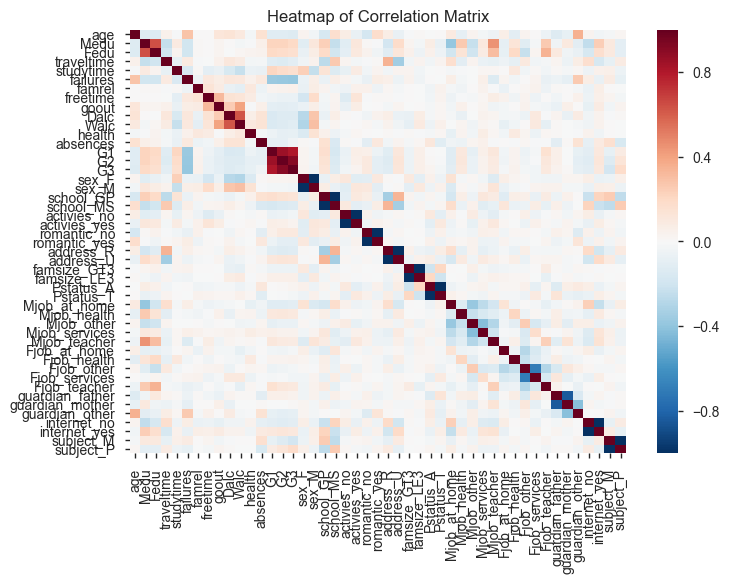

In [62]:
# now time to do something with the data
#Plot a Correlation Matrix for dummies2 with more categorical converted to numeric values
corr = students_with_dummies2.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

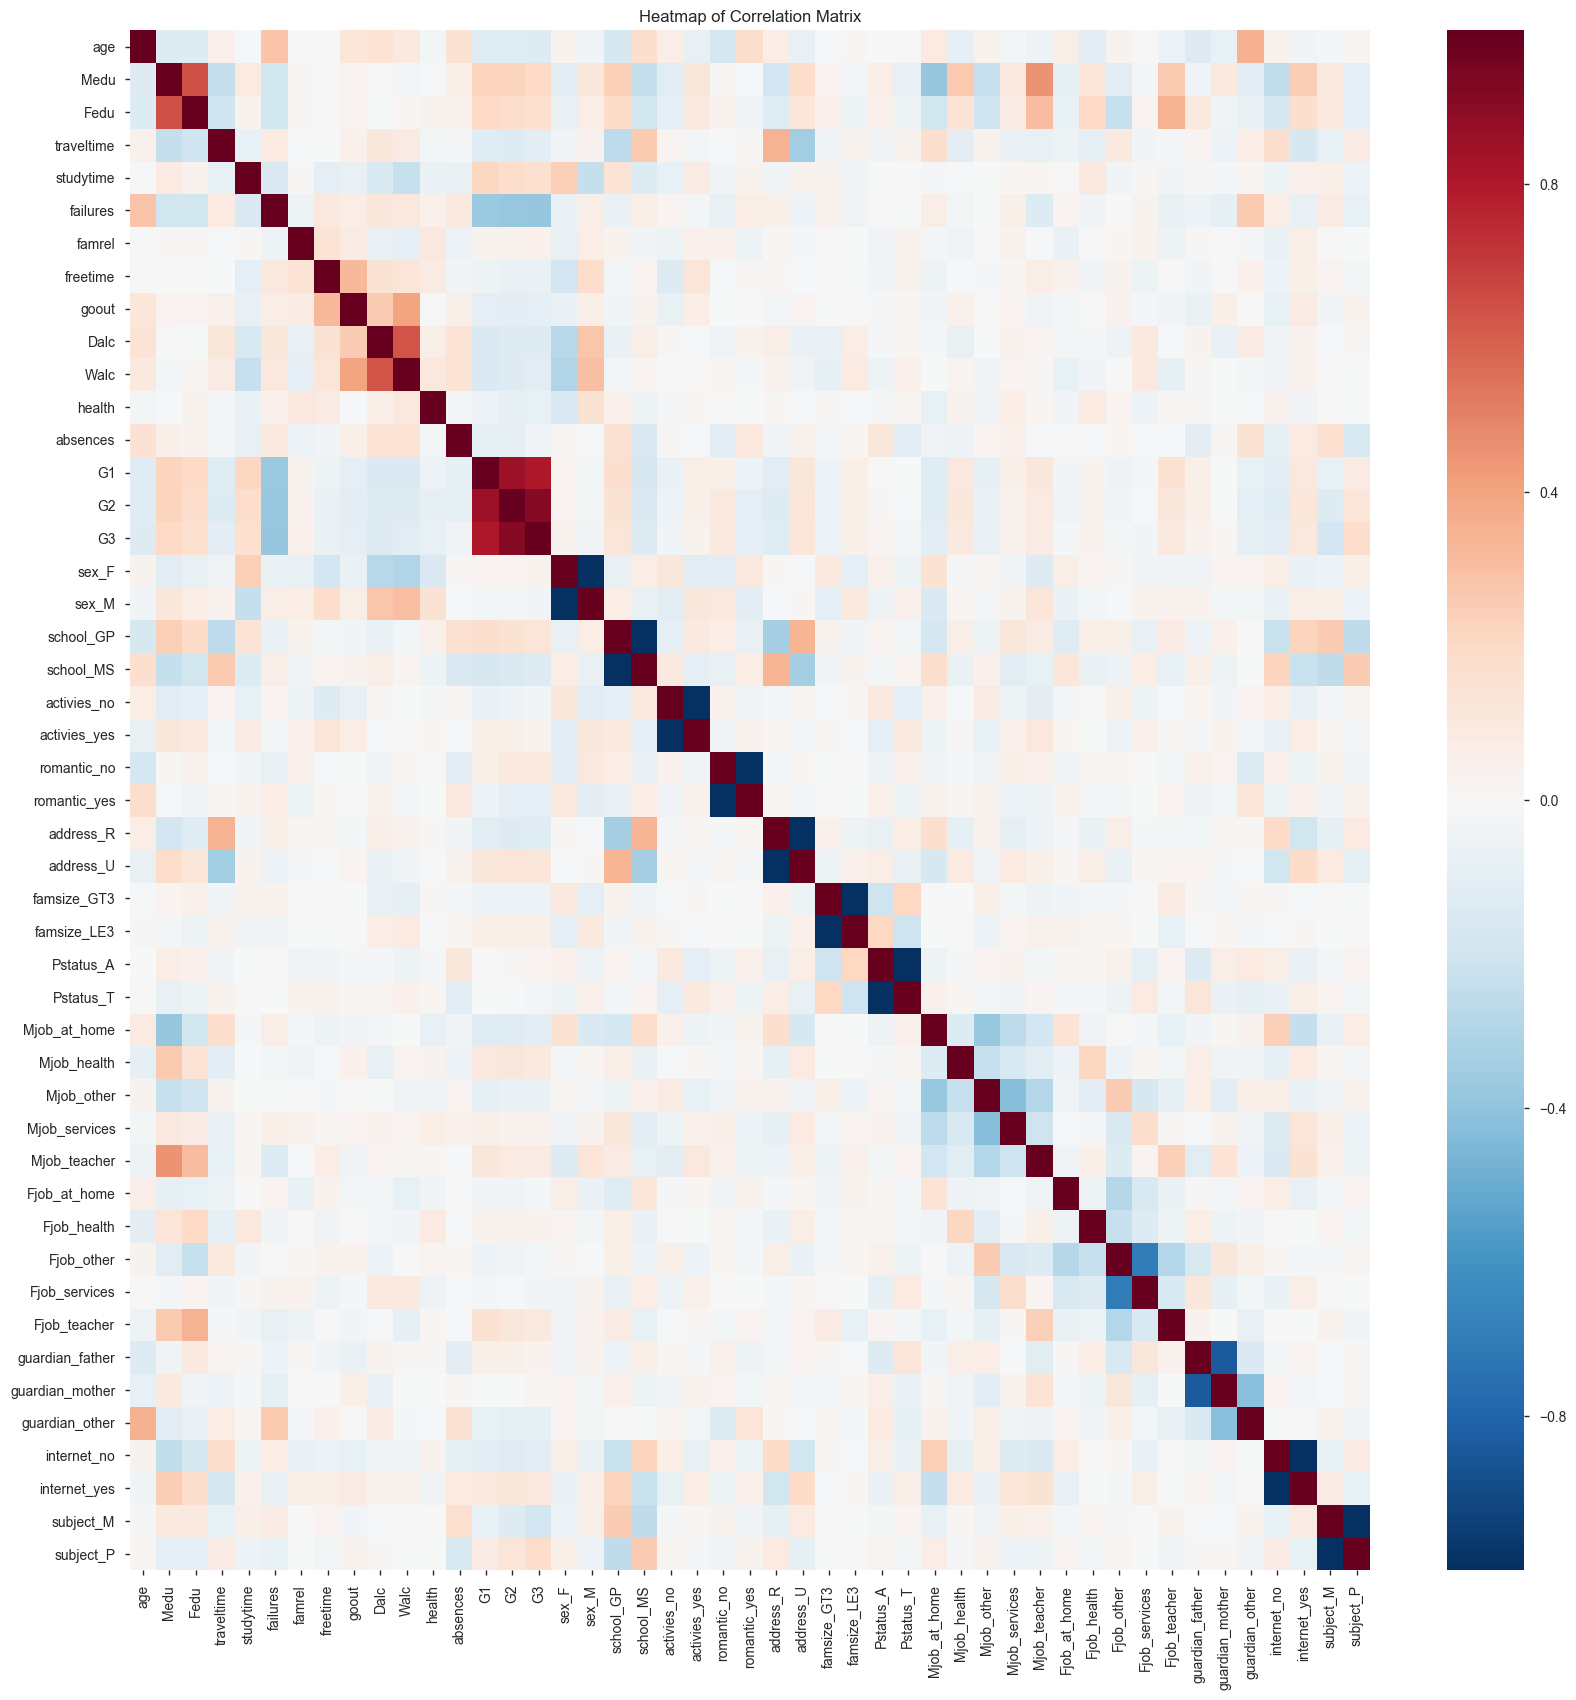

In [63]:
# larger view
# Let's make that plot a bit larger
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [64]:
# Plot each variable against each other 
# scroll down past the subplot information
# this allows plots to appear directly in the notebook
%matplotlib inline
import statsmodels.formula.api as smf
#pd.scatter_matrix(students_with_dummies2, figsize=(15,15))

In [65]:
# create a fitted model in one line  come back to this
#lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()

# print the coefficients!
#lm.params

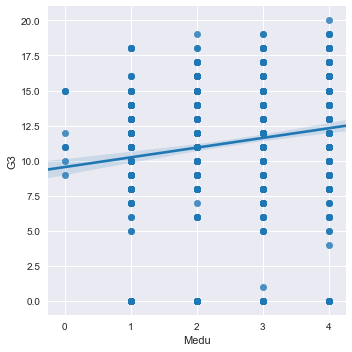

In [66]:
# check the distribution of final grade G3 vs. Medu using a scatterplot
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(y='G3', x='Medu', data=students_with_dummies2)

In [67]:
# some of the features that appear to impact grade are mother and fathers education
# The school, failures and study time
# lets create some training data and then run some regression models
